In [2]:
rules = [
#     (name, note, function_name)
    ('income', 'must be less than X', 'income_less_than(100000)'),
    ('dependents', 'must be less than X', 'dependents_greater_than(0)'),
    ('rate', 'must be greater than X', 'rate_greater_than(0)'),
#     TODO: only run these if the above are true...
    ('minimum_payout', '', 'payout_min()'),
    ('maximum_payout', '', 'payout_max()')
]


In [3]:
# person definition
#        (income, dependents, rate_amount)
person = (60000, 3, 2000)

# the entitlement for the rebate
rebate_amount = 0


# Logic rule implementations
def income_less_than(x):
    if person[0] < x:
        return True
    return False

def dependents_greater_than(x):
    if person[1] > x:
        return True
    return False

def rate_greater_than(amount):
    return person[2] > amount

def payout_max():
    if person[1] > 1:
        global rebate_amount
        rebate_amount = 600
    return True
    
def payout_min():
    if person[1] == 1:
        global rebate_amount
        rebate_amount = 180
    return True

In [4]:

def get_results():
    "evaluate the rules and output results"
    results = []
    for rule in rules:
        result = eval(rule[2])
        results.append(result)

    if all(results):
        print("You are entitled, and get a rebate of", rebate_amount)
    else:
        print("failed because:")
        for i, x in enumerate(results):
            if not x:
                print(rules[i])


# if all([eval(rule[2]) for rule in rules]):
#     print("person is entitled to a rates rebate:", r)
# else:
    

In [5]:
person = (60000, 1, 2000)
get_results()

You are entitled, and get a rebate of 180


# Question model as code 

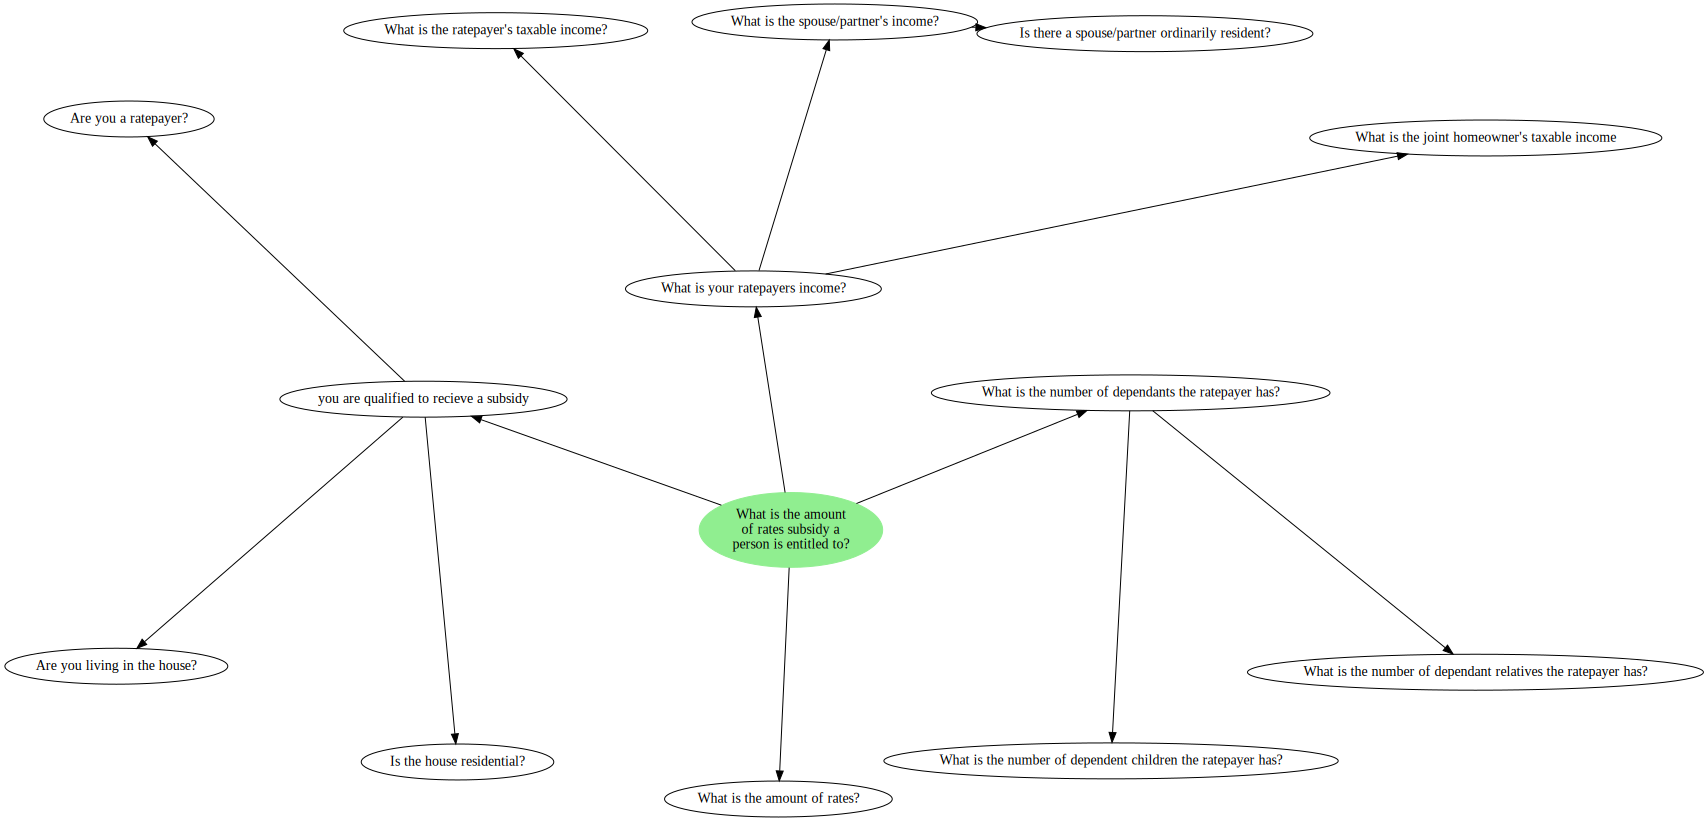

In [22]:
from graphviz import *

nodes = [
    ('goal', 'What is the amount\nof rates subsidy a\nperson is entitled to?', ['dependants', 'current_rate', 'income', 'is_qualified'], 'calculate_subsidy'),
    ('is_qualified', 'you are qualified to recieve a subsidy', ['is_ratepayer', 'is_living_in_house', 'is_residential'], None),
    ('is_ratepayer', 'Are you a ratepayer?', [], None),
    ('is_living_in_house', 'Are you living in the house?', [], None),
    ('is_residential', 'Is the house residential?', [], None),
    ('dependants', 'What is the number of dependants the ratepayer has?', ['dependants_children', 'dependants_relatives'], None),
    ('current_rate', 'What is the amount of rates?', [], None),
    ('income_household', "What is the joint homeowner's taxable income",[], None),
    ('income', 'What is your ratepayers income?', ['income_joint', 'income_personal', 'income_household'], None),
    ('income_joint', "What is the ratepayer's taxable income?", [], None),
    ('income_personal', "What is the spouse/partner's income?", ['income_spouse'], None),
    ('income_spouse', "Is there a spouse/partner ordinarily resident?", [], None),
    ('dependants_children', 'What is the number of dependent children the ratepayer has?', [], None),
    ('dependants_relatives', 'What is the number of dependant relatives the ratepayer has?', [], None),
    
]

  
questions = Digraph(name='questions', engine='neato')
questions.attr(overlap='false')

for name, description, dependants, fn in nodes:
    edges = [(name, d) for d in dependants]
    if name == 'goal':
        questions.node(name, description, style='filled', color='lightgreen')
    questions.node(name, description)
    questions.edges(edges)

questions.render('dist/questions.graph')
questions